# Exercises "Lecture 8: Exploratory Data Analysis and Visualisation"

In this session, we will compute statistics and visualizations on Wikipedia articles from 16 categories, namely: 

> Airports, Artists, Astronauts, Astronomical_objects, Building, City, Comics_characters, Companies, Foods, Monuments_and_memorials, Politicians, Sports_teams, Sportspeople, Transport, Universities_and_colleges, Written_communication.

Data: wkp directory containing .txt files         
Python libraries
- [os](https://docs.python.org/3.8/library/os.html), for listdir() to list files in a directory 
- [glob](https://docs.python.org/3/library/glob.html), for listing files in a directory whose names match certain patterns
- [re](https://docs.python.org/3.8/library/re.html), for regular expressions 
- pandas
- spacy (or Stanza)

In [2]:
# LOAD THE LIBRARIES
import os, glob, re, spacy
import pandas as pd

## Regexp and loading text files into a Pandas dataframe

**Exercise 1** 

* Get the list of file names in the **wkp/** directory
* Hint: You can use os.path.basename to help you
* Use a regexp together with the list of categories (given above: 'Airports', 'Artists'....) to split each file name  into 'id' and 'category'. For example: 

> File Name: 'Monteverde_Angel_Monuments_and_memorials'

is split into: 

> Id: 'Monteverde_Angel'

> Category: 'Monuments_and_memorials'

* store each processed filename in a list of lists. The list is of the form 
```[[File name, Id, Category], ...]```

In [3]:
file_names = [file for file in os.listdir("wkp") if re.match(re.compile(".*.txt"), file)]
file_names[:10]

['Airports_of_Serbia_Airports.txt',
 'Airport_authority_Airports.txt',
 'Airport_bus_Airports.txt',
 'Airport_check-in_Airports.txt',
 'Airport_security_Airports.txt',
 'Airspace_Airports.txt',
 'Airspace_Transport.txt',
 'Airway_beacon_Airports.txt',
 'Airway_beacon_Transport.txt',
 'Aisam-ul-Haq_Qureshi_career_statistics_Sportspeople.txt']

In [8]:
CATEGORIES = ["Airports", "Artists", "Astronauts", "Astronomical_objects", "Building", "City", "Comics_characters", "Companies", "Foods", "Monuments_and_memorials", "Politicians", "Sports_teams", "Sportspeople", "Transport", "Universities_and_colleges", "Written_communication"]
articles = []

for file in file_names:
    groups = re.match(re.compile("(.*)_(.*).txt"), file).groups()
    name, id, category = file, groups[0], groups[1]
    articles.append([name, id, category])

In [10]:
articles[:5]

[['Airports_of_Serbia_Airports.txt', 'Airports_of_Serbia', 'Airports'],
 ['Airport_authority_Airports.txt', 'Airport_authority', 'Airports'],
 ['Airport_bus_Airports.txt', 'Airport_bus', 'Airports'],
 ['Airport_check-in_Airports.txt', 'Airport_check-in', 'Airports'],
 ['Airport_security_Airports.txt', 'Airport_security', 'Airports']]

**Exercise 2** 
* Extract the content of the file (use **read()**, cf. python_basics cheatsheet))
* Create a list of lists of the form (id, category, file_content). Save it to a variable "data4pandas" e.g., 

```
data4pandas = [['Monteverde_Angel', 'Monuments_and_memorials', 'The Monteverde Angel or Angel of the Resurrect ....], ...]
```

In [12]:
# YOUR CODE HERE
data4pandas = []

for art in articles:
    with open("wkp/"+ art[0], "r", encoding="utf-8") as file:
        content = file.read()
        data4pandas.append([art[1], art[2], content])
    

In [14]:
data4pandas[0]

['Airports_of_Serbia',
 'Airports',
 'Airports of Serbia (Serbian Cyrillic: Аеродроми Србије) is a Serbian state-owned company, which owns and operates most of airports of Serbia.It has its head office at Niš Constantine the Great Airport airport in Niš.It was formed on 30 January 2016, by Government of Serbia. The main tasks of the company "Airports of Serbia" is the management, development and maintenance of airport infrastructure in Serbia. Belgrade Nikola Tesla Airport is the only main airport in Serbia, that is not operated by Airport of Serbia, as it is operated by French conglomerate Vinci Airports. The new Trebinje Airport in Bosnia and Herzegovina will be the first airport outside Serbia, owned and operated by Airports of Serbia.The main goal is that all airports, except Belgrade Nikola Tesla Airport, become a part of the Airports of Serbia.\n\n\n== Airports ==\n\n\n== References ==\n\n\n== External links ==\n\nOfficial website\n']

**Exercise 3** 

* Create a dataframe from this list of lists (i.e. data4pandas). Remember to add the following column headers: 'id', 'category' and'text' (cf. pandas CS). Save this dataframe to a variable called 'df'. (it is a convention to name pandas dataframe starting with 'df')
* inspect for yourself the first 10 and last 10 rows 

In [18]:
# YOUR CODE HERE
df = pd.DataFrame(data4pandas, columns=["id", "category", "text"])
df[:10]

,id,category,text
0,Airports_of_Serbia,Airports,Airports of Serbia (Serbian Cyrillic: Аеродром...
1,Airport_authority,Airports,An airport authority is an independent entity ...
2,Airport_bus,Airports,"An airport bus, or airport shuttle bus or airp..."
3,Airport_check-in,Airports,Airport check-in is the process whereby passen...
4,Airport_security,Airports,Airport security refers to the techniques and ...
5,Airspace,Airports,Airspace is the portion of the atmosphere cont...
6,Airspace,Transport,Airspace is the portion of the atmosphere cont...
7,Airway_beacon,Airports,An airway beacon (US) or aerial lighthouse (UK...
8,Airway_beacon,Transport,An airway beacon (US) or aerial lighthouse (UK...
9,Aisam-ul-Haq_Qureshi_career_statistics,Sportspeople,Aisam-ul-Haq Qureshi is a professional tennis ...


In [19]:
df[len(df)-10:]

,id,category,text
150,UP_Fighting_Maroons_Volleyball_Team_Sports,teams,The University of the Philippines Fighting Mar...
151,Uran_Butka,Politicians,Uran Butka (2 December 1938) is an Albanian wr...
152,Victor_Mancha_Comics,characters,"Victor Mancha, also known as Victorious, is a ..."
153,Vidnava,City,"Vidnava (German: Weidenau, Polish: Widnawa) is..."
154,Vladimir_Dzhanibekov,Astronauts,Vladimir Aleksandrovich Dzhanibekov (Russian: ...
155,Votice,City,Votice (Czech pronunciation: [ˈvocɪtsɛ]; Germa...
156,Wetted_area,Building,The surface area that interacts with the worki...
157,William_Hogarth,Artists,William Hogarth (; 10 November 1697 – 26 Octo...
158,Wolfgang_Nordwig,Sportspeople,Wolfgang Nordwig (born 27 August 1943) is a fo...
159,Židlochovice,City,Židlochovice (Czech pronunciation: [ˈʒɪdloxovɪ...


## Extract the list of categories

**Exercise 4** 
    
- store the content of the **'category'** column into a string (cf. Pandas CS)
- extract the unique tokens from that string (cf. python basic CS)   
You should find the following 16 categories

```
['Comics_characters', 'Astronauts', 'Transport', 'Artists', 'Written_communication', 'Sports_teams', 'Foods', 'Airports', 'Monuments_and_memorials', 'Politicians', 'Sportspeople', 'Building', 'Universities_and_colleges', 'Astronomical_objects', 'Companies', 'City']
```

In [24]:
list(df["category"].unique())

['Airports',
 'Transport',
 'Sportspeople',
 'memorials',
 'Foods',
 'Building',
 'Artists',
 'colleges',
 'Politicians',
 'Companies',
 'communication',
 'objects',
 'characters',
 'Astronauts',
 'City',
 'teams']

In [20]:
# option 1, without using tokenizer
tokens = [i.split('_') for i in df.category.unique()]
tokens = set(i2 for i in tokens for i2 in i)
tokens

{'Airports',
 'Artists',
 'Astronauts',
 'Building',
 'City',
 'Companies',
 'Foods',
 'Politicians',
 'Sportspeople',
 'Transport',
 'characters',
 'colleges',
 'communication',
 'memorials',
 'objects',
 'teams'}

## Extract the list of headers from the 'text' column

**Exercise 5** 

Hint: In the Wikipedia articles, headers are surrounded by "==" 

_*E.g., ==  Background == *_

- Define a function called 'get_title' which extracts headers from a text (Use a regular expression)
- Apply this function to the **'text'** column in your pandas data frame (use the pandas 'apply' method)
- Store the result (the list of headers associated with each text in the frame) into a new pandas serie called 'headers'
- Concatenate this series to your pandas dataframe

In [49]:
# YOUR CODE HERE
def get_title(text:str)->str:
    pat = re.compile("==(.*?)==") # pattern for headers 
    headers = re.findall(pat, text)
    return [h.strip("=").strip(" ") for h in headers] # removing surrounding "=" and " "

In [51]:
get_title(data4pandas[0][2])

['Airports', 'References', 'External links']

In [52]:
df["headers"] = df["text"].apply(get_title)

In [53]:
df

,id,category,text,headers
0,Airports_of_Serbia,Airports,Airports of Serbia (Serbian Cyrillic: Аеродром...,"[Airports, References, External links]"
1,Airport_authority,Airports,An airport authority is an independent entity ...,[Examples of airport authorities overseeing mu...
2,Airport_bus,Airports,"An airport bus, or airport shuttle bus or airp...","[On airport transfer, Airside transfer, Termin..."
3,Airport_check-in,Airports,Airport check-in is the process whereby passen...,"[Types of check-in, Destination or Point Check..."
4,Airport_security,Airports,Airport security refers to the techniques and ...,"[Description, Airport enforcement authority, P..."
...,...,...,...,...
155,Votice,City,Votice (Czech pronunciation: [ˈvocɪtsɛ]; Germa...,"[Administrative parts, History, Gallery, Refer..."
156,Wetted_area,Building,The surface area that interacts with the worki...,[References]
157,William_Hogarth,Artists,William Hogarth (; 10 November 1697 – 26 Octo...,"[Early life, Career, Early works, Moralizing a..."
158,Wolfgang_Nordwig,Sportspeople,Wolfgang Nordwig (born 27 August 1943) is a fo...,"[Athletic career, World rankings, Personal lif..."


## Extracting the vocabulary of each category

For each category, we extract the corresponding vocabulary i.e., the list of tokens occurring in the corresponding texts (removing the duplicates)


Optional: for each category
- extract the list of headers
- extract the noun and verbs 

**Exercise 6**

* write a function called "remove_underscores" that takes a python string and replace all the '_' in it with a whitespace ' '. e.g. "This_is_a_text" becomes  "This is a text"
* write a function called "lowercase_string" that takes a python string and lowercases it. e.g. "This is a text" becomes  "this is a text"
* apply both of the remove_underscores and lowercase_string functions on the **'clean_text'** column of your dataframe. Save the output into a new column in your dataframe called 'clean_text' (consider using method chaining)

In [54]:
# YOUR CODE HERE
def remove_underscores(text:str)->str:
    return text.replace("_", " ")

remove_underscores("This_is_a_text")

'This is a text'

In [55]:
df["clean_text"] = df["text"].apply(str.lower).apply(remove_underscores)

In [56]:
df

,id,category,text,headers,clean_text
0,Airports_of_Serbia,Airports,Airports of Serbia (Serbian Cyrillic: Аеродром...,"[Airports, References, External links]",airports of serbia (serbian cyrillic: аеродром...
1,Airport_authority,Airports,An airport authority is an independent entity ...,[Examples of airport authorities overseeing mu...,an airport authority is an independent entity ...
2,Airport_bus,Airports,"An airport bus, or airport shuttle bus or airp...","[On airport transfer, Airside transfer, Termin...","an airport bus, or airport shuttle bus or airp..."
3,Airport_check-in,Airports,Airport check-in is the process whereby passen...,"[Types of check-in, Destination or Point Check...",airport check-in is the process whereby passen...
4,Airport_security,Airports,Airport security refers to the techniques and ...,"[Description, Airport enforcement authority, P...",airport security refers to the techniques and ...
...,...,...,...,...,...
155,Votice,City,Votice (Czech pronunciation: [ˈvocɪtsɛ]; Germa...,"[Administrative parts, History, Gallery, Refer...",votice (czech pronunciation: [ˈvocɪtsɛ]; germa...
156,Wetted_area,Building,The surface area that interacts with the worki...,[References],the surface area that interacts with the worki...
157,William_Hogarth,Artists,William Hogarth (; 10 November 1697 – 26 Octo...,"[Early life, Career, Early works, Moralizing a...",william hogarth (; 10 november 1697 – 26 octo...
158,Wolfgang_Nordwig,Sportspeople,Wolfgang Nordwig (born 27 August 1943) is a fo...,"[Athletic career, World rankings, Personal lif...",wolfgang nordwig (born 27 august 1943) is a fo...


**Exercise 7**

- Define a function 'get_tokens' which, given a category, return its vocabulary (the list of tokens occurring in the texts of that category and after removing the duplicates). One way to do this is to:
   - extract the category subframe i.e., all rows whose category column matches the input category
   - create a string out of the text column of that subframe (use str.cat(sep=" "), cf. Pandas CS)
   - run spacy or Stanza model on this string and extract the tokens from the resulting document (cf. Stanza or spacy CS)
   - use python set method to remove duplicate tokens
   - use python list method to convert the resulting set back into a list
- Create a new dataframe with headers **'CATEGORY'** and **'VOCABULARY'** in which you store for each category the corresponding vocabulary

In [70]:
# YOUR CODE HERE
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

def get_tokens(category):
    # get all texts from this category
    all_texts = df[df["category"]==category]["clean_text"]
    tokens = set()
    
    for text in all_texts:
        for token in nlp(text):
            tokens.add(token)
    
    return tokens

In [74]:
get_tokens("City")

{theatre,
 singers,
 theatre,
 ,,
 `,
 in,
 vocation,
 led,
 development,
 ,,
 wotitz,
 french,
 the,
 built,
 million,
 and,
 asian,
 and,
 the,
 the,
 of,
 =,
 would,
 grand,
 each,
 special,
 isolation,
 in,
 ,,
 expanded,
 in,
 =,
 and,
 albee,
 the,
 fell,
 last,
 strata,
 workers,
 =,
 celebrates,
 ,,
 ,,
 artisan,
 to,
 an,
 their,
 theatres,
 lower,
 the,
 sohance,
 several,
 =,
 of,
 caste,
 million,
 or,
 engaged,
 .,
 have,
 people,
 with,
 =,
 forster,
 early,
 ,,
 florida).the,
 -,
 caste,
 (,
 craftsmen,
 .,
 northern,
 ',
 1998,
 relating,
 theaters,
 an,
 have,
 to,
 ,,
 ,,
 transport,
 geography,
 external,
 attractions,
 seen,
 the,
 sanctioned,
 
 ,
 the,
 amhara,
 .,
 ,,
 disdained,
 ,
 ,,
 ,,
 a,
 =,
 he,
 reopened,
 somali,
 ,,
 ,,
 .,
 was,
 :,
 town,
 traditionally,
 orchestra,
 has,
 the,
 the,
 .,
 ,,
 valleys,
 was,
 ,,
 for,
 century,
 ,
 6,
 hereditary,
 wurlitzer,
 paramount,
 the,
 slaves,
 property,
 groups,
 official,
 =,
 place,
 language,
 symphony,
 

In [81]:
data = [[cat, get_tokens(cat)] for cat in CATEGORIES]

In [82]:
df2 = pd.DataFrame(data, columns = ["category", "vocabulary"])
df2

,category,vocabulary
0,Airports,"{aerospace, purpose, eea, and, =, high, is, bu..."
1,Artists,"{!, ,, the, african, belts, angel, much, in, b..."
2,Astronauts,"{for, commander, spacewalks, ,, film, a, ., th..."
3,Astronomical_objects,{}
4,Building,"{speaks, aircraft, continuation, c, he, merlin..."
5,City,"{the, but, somali, is, ., the, pentecostal, le..."
6,Comics_characters,{}
7,Companies,"{of, controversies, sabri, to, be, also, 30, t..."
8,Foods,"{population, down, part, being, there, held, n..."
9,Monuments_and_memorials,{}


## Visualising the differences in vocabulary size

**Exercise 8**

- Use pandas 'apply' method to compute the size of each category's vocabulary (the number of tokens)
- Add a **'VOCAB SIZE'** column to your the dataframe created in the previous exercise in which you input the size of the vocabulary for each category

In [84]:
df2["vocab_size"] = df2["vocabulary"].apply(len)
df2

,category,vocabulary,vocab_size
0,Airports,"{aerospace, purpose, eea, and, =, high, is, bu...",18828
1,Artists,"{!, ,, the, african, belts, angel, much, in, b...",13314
2,Astronauts,"{for, commander, spacewalks, ,, film, a, ., th...",17474
3,Astronomical_objects,{},0
4,Building,"{speaks, aircraft, continuation, c, he, merlin...",11715
5,City,"{the, but, somali, is, ., the, pentecostal, le...",15836
6,Comics_characters,{},0
7,Companies,"{of, controversies, sabri, to, be, also, 30, t...",14559
8,Foods,"{population, down, part, being, there, held, n...",16613
9,Monuments_and_memorials,{},0


**Exercise 9**

Create a barplot showing the **VOCAB SIZE** of each **Category** (use e.g., pd.barh() method)

- the y axis should show the categories
- the x axis should show the vocabulary size

<AxesSubplot: ylabel='category'>

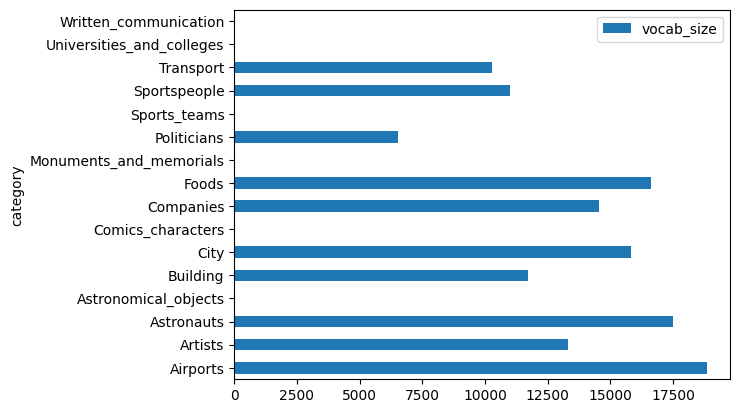

In [86]:
# YOUR CODE HERE
df2.plot.barh(x="category", y="vocab_size")

**Exercise 10**
* create a scatter plot showing the correlation between the number of headers and each category
* reminder: you have the headers stored in the pandas dataframe saved to the 'df' variable

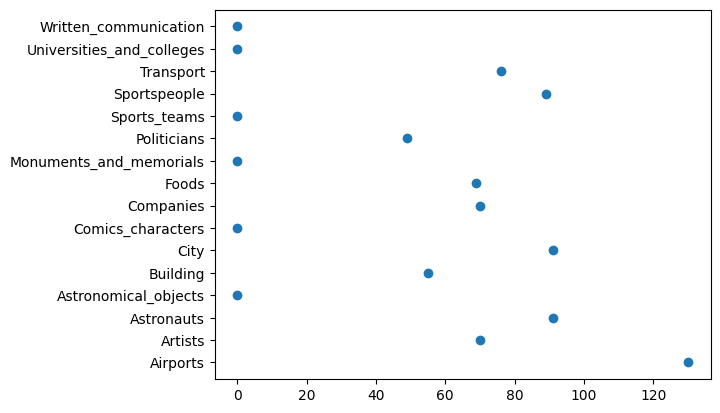

In [92]:
# YOUR CODE HERE
from matplotlib import pyplot as plt 
headers_counts = [df[df["category"]==cat]["headers"].apply(len).sum() for cat in CATEGORIES]
plt.scatter(y=CATEGORIES, x=headers_counts)